<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
def prepare_data(data):
    # колонку 'CustomerId' делает индексом, удаляет колонки 'CustomerId', 'RowNumber', 'Surname'
    # методом прямого кодирования обрабатывает колонки 'Geography','Gender'
    # заполняет пропуски в колонке 'Tenure' медианными значениями
    data.index = df['CustomerId']
    data.drop(['CustomerId', 'RowNumber', 'Surname'], axis = 1, inplace = True)
    data = pd.get_dummies(df, columns = ['Geography','Gender'])
    data['Tenure'].iloc[data['Tenure'].isna()] = data['Tenure'].median()
    return data

In [7]:
data = prepare_data(df)
data.head()

/Users/dmitrijsibircev/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CustomerId,,,,,,,,,,,,,,
15634602,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
15701354,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [8]:
def feature_target(data):
    # выделяет признаки и целевой фактор
    target = data['Exited']
    features = data.drop('Exited', axis = 1)
    return features, target

In [9]:
feature, target = feature_target(data)

In [10]:
def train_valid_test(features, target):
    # разделяет выборку на обучающую, валидационную и тестовую в соотшениях:
    # обучающая - 60%, валидационная - 20%, тестовая - 20%.
    feature_train, feature_valid, target_train, target_valid = train_test_split(
        features,
        target, 
        test_size = 0.4, 
        random_state = 12345)
    feature_test, feature_valid, target_test, target_valid = train_test_split(
        feature_valid,
        target_valid, 
        test_size = 0.5, 
        random_state = 12345)
    return feature_train, feature_valid, feature_test, target_train, target_valid, target_test

In [11]:
def log_ros(feature_train, feature_valid, feature_test, target_train, target_valid):
    # обучает модель и дает прогнозные значения
    best_f1_print, prediction_valid_print, prediction_test_print, model_print = 0,0,0,None
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(feature_train, target_train)
    prediction_valid = model.predict(feature_valid)
    prediction_test = model.predict(feature_test)
    f1_valid = f1_res(target_valid, prediction_valid)
    if f1_valid >= best_f1_print:
        best_f1_print, prediction_valid_print, prediction_test_print, model_print = f1_valid,prediction_valid,prediction_test,model           
    return prediction_valid_print, prediction_test_print, model_print, best_f1_print

def rand_frst(feature_train, feature_valid, feature_test, target_train, target_valid):
    # random forest
    best_f1_print, prediction_valid_print, prediction_test_print, model_print = 0,0,0,None
    for i in range(1,10):            
        for j in range(10,100,10):
            model = RandomForestRegressor(random_state = 12345, max_depth = i, n_estimators = j)
            model.fit(feature_train, target_train)
            prediction_valid = model.predict(feature_valid)
            prediction_test = model.predict(feature_test)
            f1_valid = f1_res(target_valid, prediction_valid)
            if f1_valid >= best_f1_print:
                best_f1_print, prediction_valid_print, prediction_test_print, model_print = f1_valid,prediction_valid,prediction_test,model           
    return prediction_valid_print, prediction_test_print, model_print, best_f1_print

def des_tr(feature_train, feature_valid, feature_test, target_train, target_valid):
    # decision tree
    best_f1_print, prediction_valid_print, prediction_test_print, model_print = 0,0,0,None
    for i in range(1,10): 
        model = DecisionTreeRegressor(random_state = 12345, max_depth = i)
        model.fit(feature_train, target_train)
        prediction_valid = model.predict(feature_valid)
        prediction_test = model.predict(feature_test)
        f1_valid = f1_res(target_valid, prediction_valid)
        if f1_valid >= best_f1_print:
            best_f1_print, prediction_valid_print, prediction_test_print, model_print = f1_valid,prediction_valid,prediction_test,model           
    return prediction_valid_print, prediction_test_print, model_print, best_f1_print

def lin_reg(feature_train, feature_valid, feature_test, target_train, target_valid):
    # linear regression
    best_f1_print, prediction_valid_print, prediction_test_print, model_print = 0,0,0,None
    model = LinearRegression()
    model.fit(feature_train, target_train)
    prediction_valid = model.predict(feature_valid)
    prediction_test = model.predict(feature_test)
    f1_valid = f1_res(target_valid, prediction_valid)
    if f1_valid >= best_f1_print:
        best_f1_print, prediction_valid_print, prediction_test_print, model_print = f1_valid,prediction_valid,prediction_test,model           
    return prediction_valid_print, prediction_test_print, model_print, best_f1_print

In [12]:
def f1_res(target, predictions):
    # считает F1
    predictions = (np.around(predictions)**2).astype(bool)
    predictions = pd.Series(predictions, index=target.index)
    f1_valid = f1_score(target, predictions)
    return f1_valid

In [13]:
def chart_ROC_AUC(features, target, name):
    # строит график ROC-AUC
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(features, target)
    probabilities_valid = model.predict_proba(features)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target, probabilities_one_valid)
    print(f'метрика AUC-ROC равна {auc_roc}')
    fpr, tpr, thresholds = roc_curve(target, probabilities_one_valid)
    plt.plot(fpr, tpr, linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-кривая {name}")
    return plt.show(),  auc_roc

In [14]:
def research_disbalance(feature, target, name_chart):
    # 
    feature_train, feature_valid, feature_test, target_train, target_valid, target_test = train_valid_test(feature, target)
    models = [log_ros(feature_train, feature_valid, feature_test, target_train, target_valid),
              rand_frst(feature_train, feature_valid, feature_test, target_train, target_valid),
              des_tr(feature_train, feature_valid, feature_test, target_train, target_valid),
              lin_reg(feature_train, feature_valid, feature_test, target_train,target_valid)]
    for i in models:
        prediction_valid, prediction_test, model_print, best_f1_print = i
        f1_valid = best_f1_print
        f1_test = f1_res(target_test, prediction_test)
        chart_ROC_AUC(feature_valid, target_valid, f'Valid {name_chart}')
        chart_ROC_AUC(feature_test, target_test, f'Test {name_chart}')
        print(f'для модели {model_print}:\
        \nf1 мера на валидационной выборке равна  {f1_valid} \
        \nf1 мера на тестовой выборке равна {f1_test}\
        \n\
        \n ********************************************\
        \n')
    
    return print('Исследование моделей завершено')

## Исследование задачи

- исследуем задачу не применяя методы балансировки классов 

метрика AUC-ROC равна 0.6364449961098594


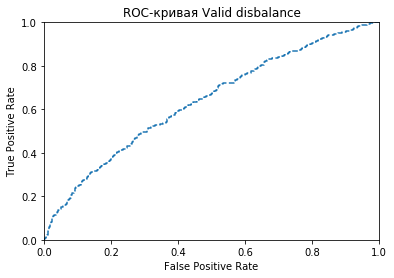

метрика AUC-ROC равна 0.6864017445060762


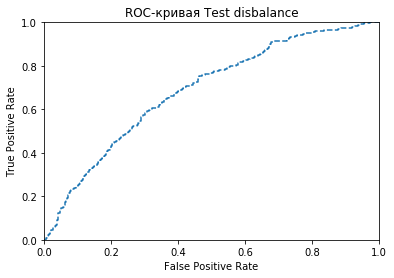

для модели LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False):        
f1 мера на валидационной выборке равна  0.13441955193482688         
f1 мера на тестовой выборке равна 0.08385744234800838        
        
 ********************************************        

метрика AUC-ROC равна 0.6364449961098594


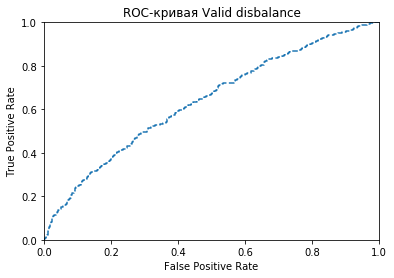

метрика AUC-ROC равна 0.6864017445060762


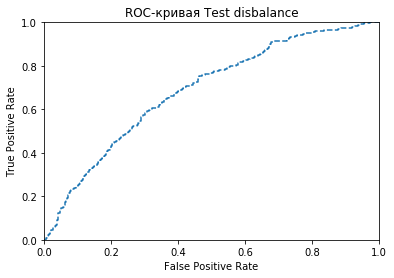

для модели RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=12345, verbose=0, warm_start=False):        
f1 мера на валидационной выборке равна  0.5523520485584219         
f1 мера на тестовой выборке равна 0.5714285714285714        
        
 ********************************************        

метрика AUC-ROC равна 0.6364449961098594


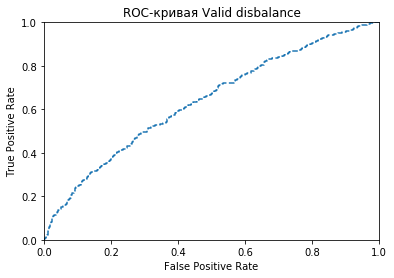

метрика AUC-ROC равна 0.6864017445060762


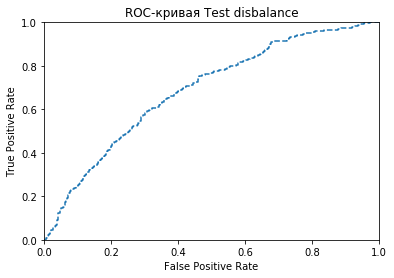

для модели DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12345, splitter='best'):        
f1 мера на валидационной выборке равна  0.53077975376197         
f1 мера на тестовой выборке равна 0.5714285714285714        
        
 ********************************************        

метрика AUC-ROC равна 0.6364449961098594


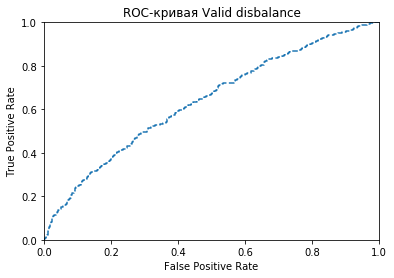

метрика AUC-ROC равна 0.6864017445060762


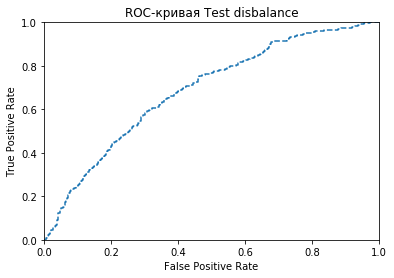

для модели LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False):        
f1 мера на валидационной выборке равна  0.1893491124260355         
f1 мера на тестовой выборке равна 0.22879684418145957        
        
 ********************************************        

Исследование моделей завершено


In [15]:
research_disbalance(feature, target, 'disbalance')

### Вывод
- при несбалансированных классах результаты прогнозных значений оттока клиентов банка непригодны для дальнейшего использования

## Борьба с дисбалансом

In [16]:
def research_balance(feature_train, feature_valid, feature_test, target_train, target_valid, target_test, name_chart):
    models = [log_ros(feature_train, feature_valid, feature_test, target_train, target_valid),
              rand_frst(feature_train, feature_valid, feature_test, target_train, target_valid),
              des_tr(feature_train, feature_valid, feature_test, target_train, target_valid),
              lin_reg(feature_train, feature_valid, feature_test, target_train,target_valid)]
    for i in models:
        prediction_valid, prediction_test, model_print, best_f1_print = i
        f1_valid = best_f1_print
        f1_test = f1_res(target_test, prediction_test)
        chart_ROC_AUC(feature_valid, target_valid, f'Valid {name_chart}')
        chart_ROC_AUC(feature_test, target_test, f'Test {name_chart}')
        print(f'для модели {model_print}:\
        \nf1 мера на валидационной выборке равна  {f1_valid} \
        \nf1 мера на тестовой выборке равна {f1_test}\
        \n\
        \n ********************************************\
        \n')
    
    return print('Исследование моделей завершено')

- метод upsample (увеличение выборки по целевому признаку равному 1)

In [17]:
target[target == 1].count()

2037

In [18]:
target[target == 0].count()

7963

In [19]:
feature_train, feature_valid, feature_test, target_train, target_valid, target_test = train_valid_test(feature, target)

In [20]:
def upsample(features, target, repeat):
    # исправляет дисбаланс классов путем увелечения единичного класса
    features_zeros = features[target == 0] 
    features_ones = features[target == 1] 
    target_zeros = target[target == 0] 
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) 
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [21]:
repeat = 3
features_upsampled, target_upsampled = upsample(feature_train, target_train, repeat)

метрика AUC-ROC равна 0.6364449961098594


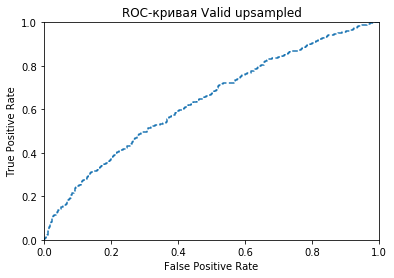

метрика AUC-ROC равна 0.6864017445060762


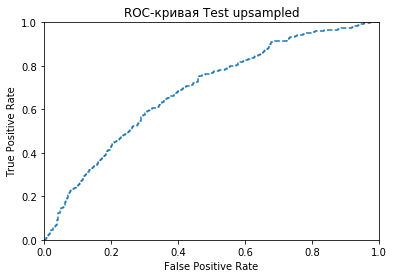

для модели LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False):        
f1 мера на валидационной выборке равна  0.39751552795031053         
f1 мера на тестовой выборке равна 0.44287158746208294        
        
 ********************************************        

метрика AUC-ROC равна 0.6364449961098594


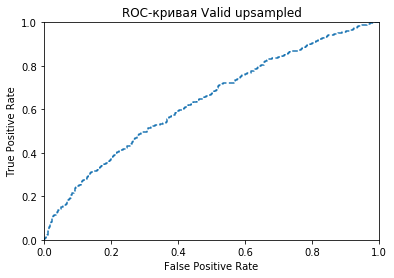

метрика AUC-ROC равна 0.6864017445060762


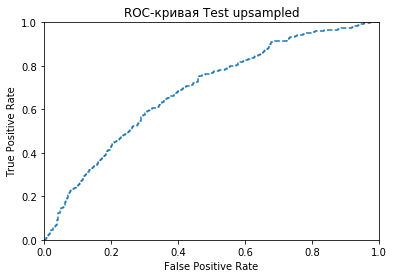

для модели RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=12345, verbose=0, warm_start=False):        
f1 мера на валидационной выборке равна  0.6234636871508379         
f1 мера на тестовой выборке равна 0.6150289017341041        
        
 ********************************************        

метрика AUC-ROC равна 0.6364449961098594


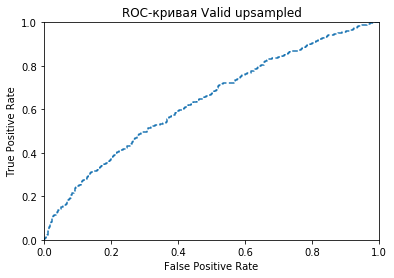

метрика AUC-ROC равна 0.6864017445060762


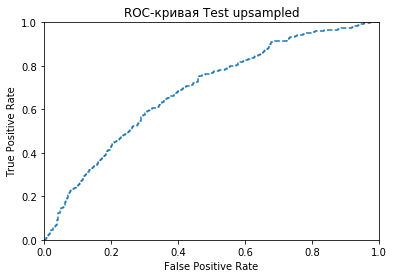

для модели DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12345, splitter='best'):        
f1 мера на валидационной выборке равна  0.5860000000000001         
f1 мера на тестовой выборке равна 0.5752032520325203        
        
 ********************************************        

метрика AUC-ROC равна 0.6364449961098594


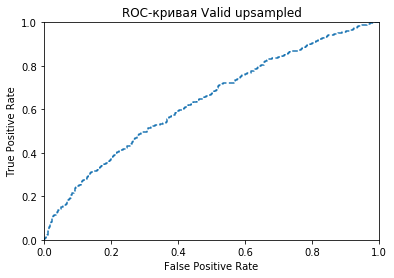

метрика AUC-ROC равна 0.6864017445060762


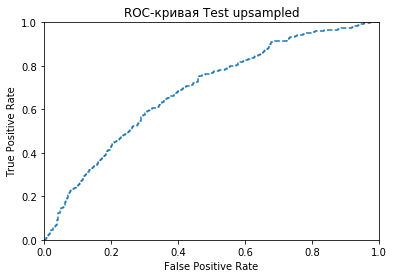

для модели LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False):        
f1 мера на валидационной выборке равна  0.46605876393110435         
f1 мера на тестовой выборке равна 0.5015105740181269        
        
 ********************************************        

Исследование моделей завершено


In [22]:
research_balance(features_upsampled, feature_valid, feature_test, target_upsampled, target_valid, target_test, 'upsampled')

- метод downsample (уменьшение выборки по целевому показателю равному 0)

In [23]:
def downsample(features, target, fraction):
    # исправляет дисбаланс классов путем уменьшения нулевого класса
    features_zeros = features[target == 0] 
    features_ones = features[target == 1] 
    target_zeros = target[target == 0] 
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
    [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
    [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [24]:
fraction = 0.3
features_downsampled, target_downsampled = downsample(feature_train, target_train, fraction)

метрика AUC-ROC равна 0.6364449961098594


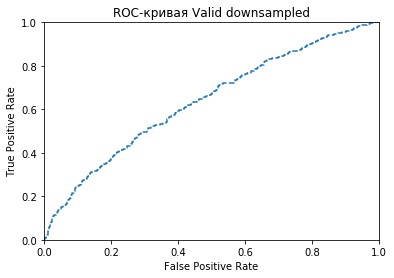

метрика AUC-ROC равна 0.6864017445060762


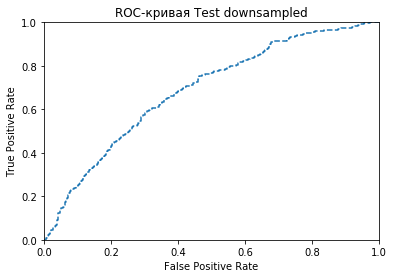

для модели LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False):        
f1 мера на валидационной выборке равна  0.4175209692451071         
f1 мера на тестовой выборке равна 0.4621004566210046        
        
 ********************************************        

метрика AUC-ROC равна 0.6364449961098594


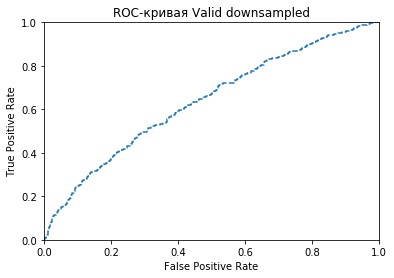

метрика AUC-ROC равна 0.6864017445060762


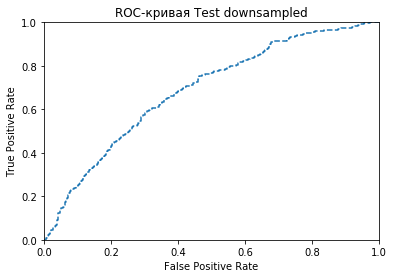

для модели RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=12345, verbose=0, warm_start=False):        
f1 мера на валидационной выборке равна  0.6129666011787819         
f1 мера на тестовой выборке равна 0.6056338028169014        
        
 ********************************************        

метрика AUC-ROC равна 0.6364449961098594


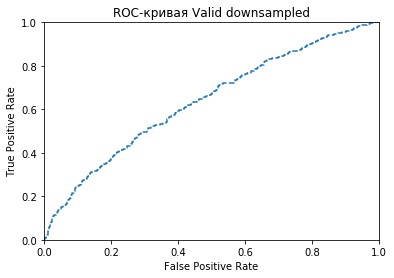

метрика AUC-ROC равна 0.6864017445060762


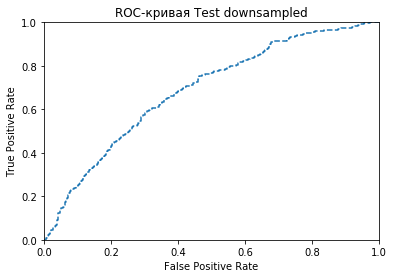

для модели DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12345, splitter='best'):        
f1 мера на валидационной выборке равна  0.584051724137931         
f1 мера на тестовой выборке равна 0.5800865800865802        
        
 ********************************************        

метрика AUC-ROC равна 0.6364449961098594


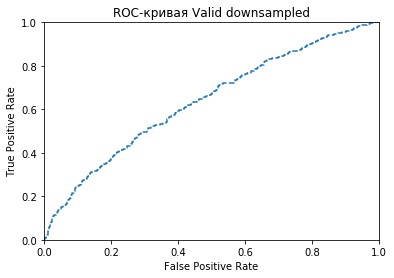

метрика AUC-ROC равна 0.6864017445060762


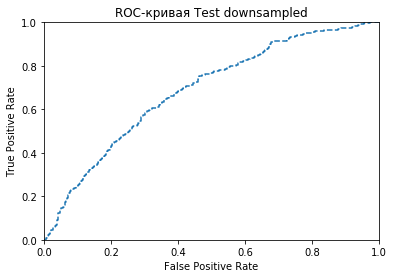

для модели LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False):        
f1 мера на валидационной выборке равна  0.47701149425287354         
f1 мера на тестовой выборке равна 0.49476688867745        
        
 ********************************************        

Исследование моделей завершено


In [25]:
research_balance(features_downsampled, feature_valid, feature_test, target_downsampled, target_valid, target_test, 'downsampled')

### Вывод
- при использовании метода <b>upsample</b> прогноз получается значительно точнее чем для несбалансированных классов на всех моделях, но в то же время данный метод в паре с моделью случайного леса  дает f1 меру большую 0.59, что позволяет решить задачу по условиям проекта
- метод <b>downsample</b> в паре с моделью случайного леса позволяет получить более точные прогнозные значения для данной задачи и подходит для ее решеения т. к. f1 мера более 0.59

## Общий вывод

- прогнозные значения оттока клиентов банка посчитаны и отдел маркетинга теперь знает с кем нужно работать 
- данный проект наглядно показывает насколько важно проверять целевую выборку на дисбаланс классов, а также, как важно использовать различные методы по его устранению

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть структурированный вывод в конце преокта!
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*